# WITH PANDAS AND MATPLOTLIB

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 


INSTRUCTIONS

1. Number of people by gender
1. Kill weapon
1. Age of killed people
1. Race of killed people
1. Killed People According to Races (Pie Chart)
1. Most common 15 Name or Surname of killed people

<br>

read data

if didn't work you can use this parameters: encoding="windows-1252"

In [2]:
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")
kill.head(3)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False


## 1: Plot number of people by gender

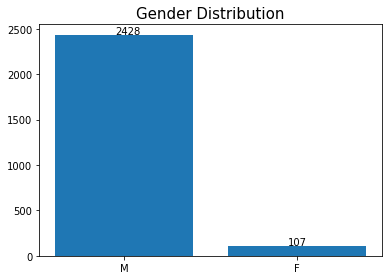

In [3]:
# with matplotlib
gender = kill.gender.value_counts() 
fig, ax = plt.subplots(figsize = (5.5,4))
ax.bar(gender.index, gender.values)
plt.title('Gender Distribution', size = 15)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x() + 0.35, p.get_height() + 15))
plt.tight_layout()
plt.show()


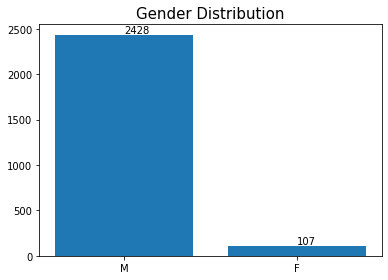

In [4]:
# with matplotlib
fig, ax = plt.subplots(figsize = (5.5,4))
ax.bar(kill.gender.unique(), kill.gender.value_counts())
plt.title('Gender Distribution', size = 15)
for index,data in enumerate(kill.gender.value_counts()):
    plt.text(x=index , y =data , s=f"{data}" , fontdict=dict(fontsize=10), va = "bottom")
plt.tight_layout()
plt.show()


In [5]:
kill.gender.value_counts()

M    2428
F     107
Name: gender, dtype: int64

<AxesSubplot:>

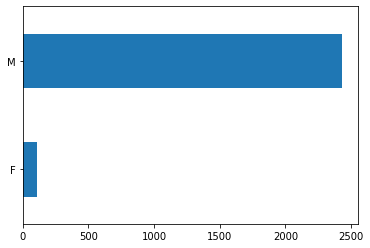

In [6]:
# with pandas plot
kill.gender.value_counts().sort_values().plot(kind = 'barh')


## 2: Plot 7 most common kill weapons

In [7]:
armed = kill.armed.value_counts()[:7]
armed


gun               1398
knife              373
vehicle            177
unarmed            171
undetermined       117
toy weapon         104
unknown weapon      18
Name: armed, dtype: int64

<AxesSubplot:>

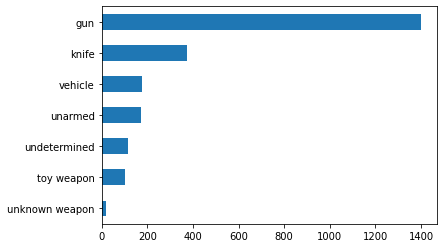

In [8]:
# with pandas plot
kill.armed.value_counts()[:7].sort_values().plot(kind = 'barh')


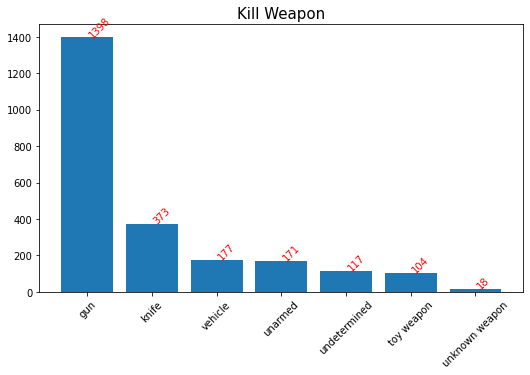

In [9]:
# with matplotlib
fig, ax = plt.subplots(figsize = (7.5,4.5))
ax.bar(kill.armed.value_counts()[:7].index, kill.armed.value_counts()[:7])
plt.title('Kill Weapon', size = 15)
for index,data in enumerate(kill.armed.value_counts()[:7]):
    plt.text(x=index , y =data , s=f"{data}" , fontdict=dict(fontsize=10, color = "r"), rotation =45)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


## 3: Plot number of age of killed people under two groups : Under 25 and Above 25

In [10]:
kill["age_cat"] = kill.age > 25
kill["age_cat"].replace({True: "above25", False: "below25"}, inplace=True)
kill["age_cat"].unique()


array(['above25', 'below25'], dtype=object)

In [11]:
kill.sample(3)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
1407,1593,Christopher Michael Moran,05/06/16,shot,gun,31.0,M,W,Cape Coral,FL,False,other,Car,False,above25
714,840,Gerardo Ramirez,21/09/15,shot,gun,24.0,M,H,Dallas,TX,True,attack,Not fleeing,False,below25
827,973,Killian O'Quinn,01/11/15,shot,gun,20.0,M,W,Eureka,CA,False,attack,Not fleeing,False,below25


In [12]:
kill.age_cat.value_counts()

above25    1905
below25     630
Name: age_cat, dtype: int64

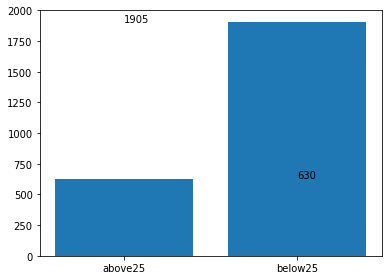

In [13]:
# with matplotlib
fig, ax = plt.subplots(figsize = (5.5,4))
ax.bar(kill.age_cat.unique(), kill.age_cat.value_counts().sort_values())
for index,data in enumerate(kill.age_cat.value_counts()):
    plt.text(x=index , y =data , s=f"{data}" , fontdict=dict(fontsize=10))
plt.tight_layout()
plt.show()


<AxesSubplot:>

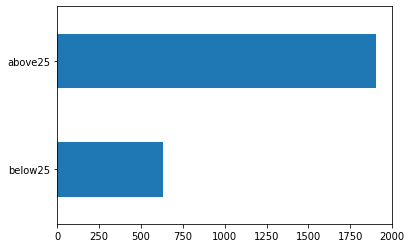

In [14]:
# with pandas plot
kill["age_cat"].value_counts().sort_values().plot(kind = 'barh')

## 4: Plot number of killed poeple by race

In [15]:
kill["race"].value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

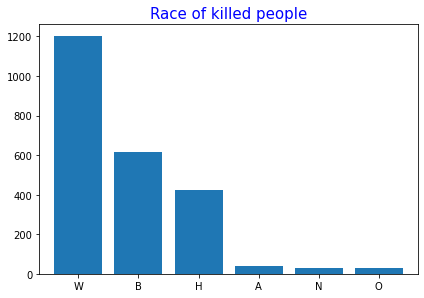

In [16]:
# with matplotlib
kill["race"].value_counts().plot.bar(width = 0.8)
plt.tight_layout()
plt.xticks(rotation=0)
plt.title('Race of killed people', size = 15, color = "b")
plt.show()


## 5: Killed People According to Races (Pie Chart)

In [17]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [18]:
kill.race.unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [19]:
kill.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

In [20]:
kill.dropna(subset = ["race"], inplace = True)
kill.race.unique()


array(['A', 'W', 'H', 'B', 'O', 'N'], dtype=object)

In [21]:
kill.shape

(2340, 15)

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart (You can use Matplotlib)**

In [22]:
d = kill["race"].value_counts()
d


W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [23]:
X = d.index
X


Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

In [24]:
d.values


array([1201,  618,  423,   39,   31,   28], dtype=int64)

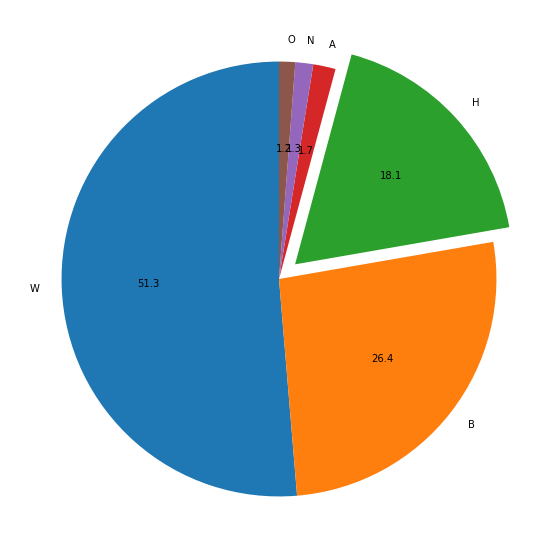

In [25]:
# matplotlib
e = (0,0,0.1,0,0,0)
plt.figure(figsize = (12,10))
plt.pie(d, labels = X, explode = e, autopct="%.1f", startangle=90)

plt.show()


## mehmetfatihdata